In [1]:
import sys
import os
import subprocess
from six import string_types
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
import cv2
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras import regularizers
%matplotlib inline
from keras.models import load_model

Using TensorFlow backend.


In [2]:
PLANET_KAGGLE_ROOT = os.path.abspath("/Users/sunchenxi/Desktop/lab/kaggle/amazon/")
PLANET_KAGGLE_JPEG_DIR = os.path.join(PLANET_KAGGLE_ROOT, 'train-jpg')
PLANET_KAGGLE_LABEL_CSV = os.path.join(PLANET_KAGGLE_ROOT, 'train_v2.csv')
assert os.path.exists(PLANET_KAGGLE_ROOT)
assert os.path.exists(PLANET_KAGGLE_JPEG_DIR)
assert os.path.exists(PLANET_KAGGLE_LABEL_CSV)

# load model

In [3]:
model = load_model('my_model_weather.h5')

# load test-jpg

In [4]:
test_img=[0]*40669
for i in range(0,40669):
    test_img[i]=cv2.imread(PLANET_KAGGLE_ROOT+"/test-jpg/test_"+str(i)+".jpg")
#test_x teat images
test_x = [np.reshape(cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA),[1,64,64,3]) for img in test_img]
test=np.vstack((test_x))

# predict test-jpg

In [5]:
weather_result=model.predict(test)

In [10]:
#test_y_weather: predict tags

test_y_weather=[] 
for i in range(40669): 
    test_y_weather.append([]) 
    
for i in range(0,40669):
    if np.argmax(weather_result[i],0)==0:
        test_y_weather[i].append("clear")
    elif np.argmax(weather_result[i],0)==1:
        test_y_weather[i].append("partly_cloudy")
    elif np.argmax(weather_result[i],0)==2:
        test_y_weather[i].append("haze")
    elif np.argmax(weather_result[i],0)==3:
        test_y_weather[i].append("cloudy")

In [11]:
img_name=[0]*40669
for n in range(0,40669):
    img_name[n]="test_"+str(n)+".jpg"

In [12]:
final_df = pd.DataFrame({'image_name':img_name,'tags':test_y_weather})
final_df.head(10)

,image_name,tags
0,test_0.jpg,[clear]
1,test_1.jpg,[clear]
2,test_2.jpg,[partly_cloudy]
3,test_3.jpg,[partly_cloudy]
4,test_4.jpg,[partly_cloudy]
5,test_5.jpg,[clear]
6,test_6.jpg,[partly_cloudy]
7,test_7.jpg,[clear]
8,test_8.jpg,[clear]
9,test_9.jpg,[haze]


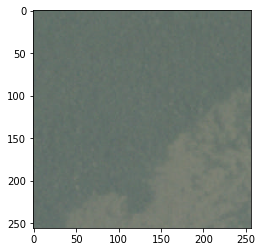

In [19]:
numofimg=9
test_img=mpimg.imread(PLANET_KAGGLE_ROOT+"/test-jpg/test_"+str(numofimg)+".jpg")
plt.imshow(test_img)

# accuracy for train-jpg sample

In [31]:
#labels of training set
labels_df = pd.read_csv(PLANET_KAGGLE_LABEL_CSV)
label_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
a=labels_df.values[:,5:6]
b=labels_df.values[:,12:13]
c=labels_df.values[:,2:3]
d=labels_df.values[:,11:12]
labels_weather=np.hstack((a,b))
labels_weather=np.hstack((labels_weather,c))
labels_weather=np.hstack((labels_weather,d))

## clear partly-cloudy haze cloudy

In [37]:
labels_weather

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ..., 
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=object)

In [39]:
#get image sample and predict 
trainset_img=[0]*1000
n=20000
for t in range(0,1000):
    trainset_img[t]=cv2.imread(PLANET_KAGGLE_ROOT+"/train-jpg/train_"+str(n)+".jpg")
    n+=1
trainset_x = [np.reshape(cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA),[1,64,64,3]) for img in trainset_img]
trainset=np.vstack((trainset_x))
weather_trainset_result=model.predict(trainset)

In [51]:
#sample's real weather labels
weather_real_y=labels_weather[20000:21000]

In [48]:
#sample' predicting labels
weather_predict_y=[] 
for i in range(1000): 
    weather_predict_y.append([]) 
for i in range(0,1000):
    if np.argmax(weather_trainset_result[i],0)==0:
        weather_predict_y[i].append(1)
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(0)
    elif np.argmax(weather_trainset_result[i],0)==1:
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(1)
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(0)
    elif np.argmax(weather_trainset_result[i],0)==2:
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(1)
        weather_predict_y[i].append(0)
    elif np.argmax(weather_trainset_result[i],0)==3:
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(0)
        weather_predict_y[i].append(1)

In [97]:
#predict lalbes
weather_predict_y[0:100]

[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0,

In [87]:
#real labels
weather_real_y[0:10]

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]], dtype=object)

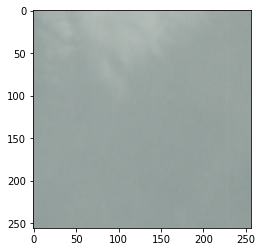

In [55]:
numofimg=20008
train_img=mpimg.imread(PLANET_KAGGLE_ROOT+"/train-jpg/train_"+str(numofimg)+".jpg")
plt.imshow(train_img)

# accuracy: number of right predicting lebles/ number of all labels

In [100]:
right_num=0.0
for i in range(0,1000):
    if (weather_real_y[i]==np.array(weather_predict_y[i])).all():
        right_num+=1       

In [102]:
right_num/1000

0.878